# Τεχνολογία και ανάλυση εικόνων και βίντεο
## 1η <del>ομαδική</del> ατομική εργασία
Παράδοση: 17.04.2022 <br>
Δημήτριος Καλέμης - el18152

## <font color=e5bdb5>Includes, φόρτωμα εικόνας, έτοιμες υλοποιήσεις</font>

In [ ]:
import urllib.request

import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

from scipy import ndimage

from skimage import data, io, filters, img_as_float, img_as_ubyte, img_as_uint

from scipy.stats import entropy 

from matplotlib.pyplot import figure

In [ ]:
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')

arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8) #uint8

BGR = cv2.imdecode(arr,-1)
print(BGR.shape)

(512, 512, 3)


In [ ]:
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
print(Y.shape)
#tmp = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
#Y = tmp

(512, 512)


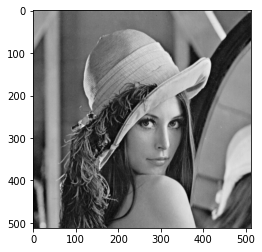

In [ ]:
plt.imshow(Y, cmap="gray")

In [ ]:
N = 5 # Number of levels of the pyramid
L = [Y] # L^0 (the base of the pyramid)

In [ ]:
for n in range(N-1):
    print(n, len(L), len(L[n]))
    L.append(cv2.pyrDown(L[n]))

0 1 512
1 2 256
2 3 128
3 4 64


Text(0.5, 1.0, 'L[4]')

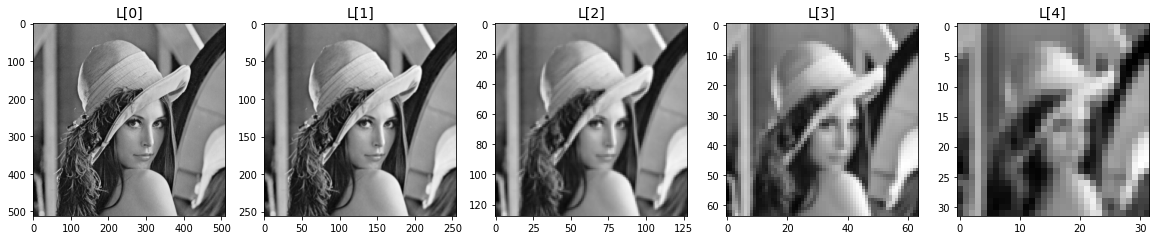

In [ ]:
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(L[0], cmap="gray")
ax0.set_title('L[0]', fontsize=14)
ax1.imshow(L[1], cmap="gray")
ax1.set_title('L[1]', fontsize=14)
ax2.imshow(L[2], cmap="gray")
ax2.set_title('L[2]', fontsize=14)
ax3.imshow(L[3], cmap="gray")
ax3.set_title('L[3]', fontsize=14)
ax4.imshow(L[4], cmap="gray")
ax4.set_title('L[4]', fontsize=14)


## <font color=e5bdb5>1. Θεωρητικό μέρος</font>

####Ερώτημα α

**Ποιο είναι το πρόβλημα και ποιες είναι οι κύριες ιδέες που διαπραγματεύεται το άρθρο αυτό;**

To άρθρο των Burt και Adelson διαπραγματεύεται μια νέα και αποδοτική τεχνική κωδικοποίησης εικόνων. Η ιδέα βασίζεται στην αποσυσχέτιση των εικονοστοιχείων της εικόνας προκειμένου να επιτευχθεί μεγαλύτερη συμπίεση και αποδοτικότερη κωδικοποίηση. Είναι σημαντικό να σημειωθεί, πως η αποσυσχέστιση της αρχικής εικόνας πρέπει να πραγματοποιείται πριν από την κωδικοποίησή της, έτσι ώστε να αφαιρείται η πλεονάζουσα πληροφορία, η οποία οφείλεται στην συσχέτιση των γειτονικών εικονοστοιχείων. Η μέθοδος που προτείνεται στο άρθρο αποτελεί ένα συγκερασμό ήδη υπάρχοντων προγνωστικών (predictive) και προγνωστικών (noncasual) μεθόδων κωδικοποίησης. Αναλυτικότερα, η τεχνική που προτείνεται στο paper, χαρακτηρίζεται από σχετικά απλούς και τοπικούς υπολογισμούς, συνδυάζοντας έτσι την απλότητα και το χαμηλό υπολογιστικό κόστος των predictive μεθόδων με την υψηλότερη συμπίεση που επιτυγχάνουν οι noncausal τεχνικές. Βασικά εργαλεία για την πραγματοποίηση της μεθόδου αποτελούν η Gaussian και η Laplacian πυραμίδα. Η Gaussian πυραμίδα είναι ένα σύνολο εικόνων που προκύπτουν μέσω διαδοχικού φιλτραρίσματος χαμηλής διέλευσης (low pass filter) και υποδειγματοληψίας της αρχικής εικόνας. Αποτέλεσμα της υποδειγματοληψίας είναι κάθε επόμενο επίπεδο της πυραμίδας να έχει μικρότερο μέγεθος από την προηγούμενη με συντελεστή κλίμακας ίσο με 1/2, οπότε τελικά με τη στοίβαξη των επιμέρους επιπέδων προκύπτει μια πυραμίδα. Τέλος, η Laplacian πυραμίδα μια εικόνας προκύπτει μέσω της Gaussian, έπειτα από διαδοχική επέκταση (expansion0 επιπέδων και υπολογισμό των διαφορών των διαδοχικών εικόνων της Gaussian πυραμίδας.

####Ερώτημα β

**Ποιος είναι ο σκοπός του φίλτρου Gauss στην κατασκευή της πυραμίδας; Τι θα συνέβαινε αν
χρησιμοποιήθηκε μόνο υποδειγματοληψία;**

Η πυραμίδα Gauss αποτελείται από την αρχική εικόνα εισόδου στην βάση κι έπειτα για κάθε επόμενο επίπεδο, από την εικόνα που προέρχεται από το προηγούμενο της επίπεδο, αφού αυτή διέλθει διαδοχικά από ένα low pass φίλτρο και εν συνεχεία υποδειγματοληπθεί κατά 2. Λόγω του φαινομένου της αναδίπλωσης (aliasing), η υποδειγματοληψία δεν είναι από μόνη της αρκετή για τη κατασκευή της πυραμίδας Gauss. Το θεώρημα του Nyquist προβλέπει πότε θα έχουμε το φαινόμενο αναδίπλωσης. Πιο συγκεκριμένα, αναδίπλωση προκύπτει όταν ένα σήμα δειγματοληπτηθεί με ρυθμό τέτοιο ώστε να είναι ανεπαρκής η πληροφορία του νέου σήματος, δηλαδή όταν η συχνότητα της δειγματοληψίας  fs  είναι μικρότερη από το διπλάσιο του εύρους ζώνης της εικόνας  fm. Στην περίπτωση που προκύψει φαινόμενο aliasing, η εικόνα οδηγείται σε μη αναστρέψιμη παραμόρφωση με αποτέλεσμα να μην είναι δυνατή η ανάκτηση της αρχικής. Στην πυραμίδα Gauss, όπου η υποδειγματοληψία σε κάθε επίπεδο είναι διπλάσια από το προηγούμενο του, η παραμόρφωση λόγω αναδίπλωσης είναι αναπόφευκτη χωρίς τη χρήση ενός φίλτρου. Η λύση σε αυτό είναι η εξομάλυνση, με την οποία ελαττώνονται αποτελεσματικά οι μέγιστες συχνότητες και πραγματοποιείται με τη χρήση ενός low pass filter.  Συνεπώς, για την κατασκευή μιας πυραμίδας Gauss, εφαρμόζουμε διαδοχικά σε μία είκονα πρώτα εξομάλυνση με χρήση του φίλτρου κι έπειτα υποδειγματοληψία μέχρι το επιθυμητό βάθος.

####Ερώτημα γ

**Πώς χρησιμοποιείται η πυραμίδα Laplacian για την επίλυση του προβλήματος που αναφέρεται
στο άρθρο; Γιατί αυτή η αναπαράσταση εικόνας είναι καλύτερη από την πυραμίδα Gauss στο
πλαίσιο της εργασίας που διαπραγματεύεται το άρθρο;**

H Laplacian πυραμίδα ορίζεται ως μια αλληλουχία από εικόνες σφάλματος (error images) $L_{i}$ με $i∈[0,Ν]$. H κάθε εικόνα $L_{i}$ για $i∈[0,N-1]$ προκύπτει ως η διαφορά μεταξύ δύο (διαδοχικών) επιπέδων της Gaussian πυραμίδας, έστω $ g_{i} - g_{i+1}$, έπειτα από expansion των αντίστοιχων επιπέδων $ g_{i+1} $. Επειδή η Gaussian πυραμίδα δεν περιλαμβάνει επίπεδο $g_{N+1}$, ορίζουμε το επίπεδο της Laplacian πυραμίδας $L_{N}$, όχι ως διαφορά επιπέδων, αλλά ίσο με το αντίστοιχο επίπεδο της Gaussian. Δηλαδή ισχύει: 

\begin{equation}
  \left\{\begin{array}{rcl}
    L_{N} & = & g_{N} \text{ /* the top level of the Gaussian pyramid */}\\
    L_i     & = & g_i - \text{EXPAND}(g_{i+1});~n\in\{N-1,N-2,\cdots,0\}
\end{array}\right.
\end{equation}

όπου ο EXPAND operator εκτελεί 1/2-subpixel διδιάστατη παρεμβολή.

Αφαιρώντας την αρχική τιμή του pixel μιας εικόνας από την προβλεπόμενη τιμή του αφαιρεί μεγάλο μέρος της συσχέτισης μεταξύ των εικονοστοιχείων, επιφέοντας έτσι μεγαλύτερη συγκέντρωση των τιμών των pixels κοντά στο μηδέν. Αυτό έχει ως αποτέλεσμα την μείωση της εντροπίας και της διακύμανσης της εικόνας, καθιστώντας δυνατή την κωδικοποίηση με μικρότερο αριθμό bits. Έπειτα από κβάντιση των επιπέδων της Laplacian πυραμίδας πετυχαίνουμε μεγαλύτερη μείωση της εντροπίας και έτσι προκύπτει η τελική πυραμίδα, με επίπεδα Cl έναντι Ll. Η τεχνική αυτή έχει ως αποτέλεσμα υψηλή συμπίεση και ελάττωση της εντροπίας.

####Ερώτημα δ

**Περιγράψτε πώς να ανακτήσετε την εικόνα χρησιμοποιώντας μόνο την πυραμίδα Laplacian.
Διατυπώστε την απάντησή σας χρησιμοποιώντας μια εξίσωση που περιγράφει αυτήν τη
διαδικασία. Θα μπορέσουμε να ανακτήσουμε τέλεια την αρχική εικόνα;**

Η ανάκτηση της εικόνας από τη Laplacian πυραμίδα είναι εφικτή έπειτα από επέκταση όλων των επιπέδων της πυραμίδας και η διαδοχική άθροισή τους. To expansion της κάθε εικόνας ανά επίπεδο πραγματοποιείται τόσες φόρες όσες απαιτούνται έτσι ώστε η αντίστοιχη εικόνα  Ll  να αποκτήσει τις διαστάσεις της αρχικής εικόνας εισόδου  g0. Ισχύει η σχέση: $ g_{0} =\sum_{l=0}^{N} L_{l,l} $, όπου $L_{l,l}$ το επίπεδο $l$ της Laplacian πυραμίδας εκτεταμένο κατά $l$ φορές. Μια καλύτερη διαδικασία είναι η επέκταση του επιπέδου $L_N$ της πυραμίδας μία φορά και η πρόσθεσή του στο $L_{N-1}$, η επέκταση της προκύπτουσας εικόνας και η πρόσθεσή της στο επίπεδο $L_{N-2}$ κ.ο.κ, ωσότου καταλήξουμε στο μηδενικό επίπεδο και η $g_0$ έχει ανακτηθεί πλήρως. Η ανάκτηση της εικόνας είναι τέλεια, δεδομένου ότι δεν έχει προηγηθεί κβάντιση στη Laplacian πυραμίδα. Εάν η παραπάνω διαδικασία πραγματοποιηθεί έπειτα από κβαντισμό των επιπέδων της Laplacian, η ανακατασκευασμένη εικόνα $r_0$ που προκύπτει διαφέρει από την αρχική.

## <font color=e5bdb5>2. Εργαστηριακό μέρος</font>

###Α. Υλοποίηση αλγορίθμου

####im_show_all

In [ ]:
def im_show_all(L):
  if isinstance(L, list):
    f, axes = plt.subplots(1, len(L), figsize = (20, 20))
    for ax, n in zip(axes, range(len(L))):
      ax.imshow(L[n], cmap = 'gray')
      ax.set_title("%d" %n)
  else:
    f, ax = plt.subplots()
    ax.imshow(L, cmap = 'gray')

In [ ]:
def im_show_all(L, size=None, titles=None):
  if size is None:
    size = 4
  if titles is None:
    titles = []
  if isinstance(L, list):
    elements = len(L)
    f, axes = plt.subplots(1, elements, figsize = (size * elements, size * elements))
    for ax, n in zip(axes, range(elements)):
      ax.imshow(L[n], cmap = 'gray')#.astype(np.uint8)
      titles.append(n) 
      ax.set_title("%s" %titles[n])
  else:
    f, ax = plt.subplots(1, 1, figsize = (size, size))
    ax.imshow(L, cmap = 'gray')#.astype(np.uint8)
    if isinstance(titles, list):
      ax.set_title('')
    else:
      ax.set_title("%s" %titles)

####GKernel

α) Υλοποιήστε τη συνάρτηση h = GKernel(a), η οποία θα δημιουργεί ένα Generating Kernel,
εξαρτώμενο από την παράμετρο ‘a’, όπως αυτή ορίζεται στη σελίδα 533 του άρθρου The Laplacian
Pyramid as a Compact Image Code των Burt και Adelson.

In [ ]:
def GKernel(a):
  b = 0.25
  c = 0.25 - a/2
  w = np.array([[c, b, a, b, c]]) 
  return w

print(GKernel(3/8))


[[0.0625 0.25   0.375  0.25   0.0625]]


In [ ]:
def GKernel2D(a):
  w = GKernel(a)
  return np.dot(w.T, w)

print(GKernel2D(3/8))

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


####GREDUCE

β) Υλοποιήστε τη συνάρτηση I_out = GREDUCE(I, h), η οποία θα εφαρμόζει την εξίσωση (1)
(σελίδα άρθρου 533).


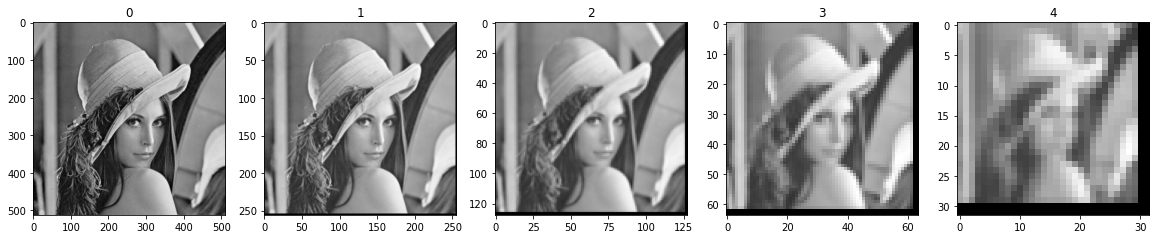

In [ ]:
#Version 1 - 1D at a time

def GREDUCE_ROWS(I, h):          #I is a row of the image
  pixel = 0
  border = len(I)/2
  newRow = np.zeros(int(border))
  #print(int(border))
  for j in range(0,int(border)-2):
    pixel = 0
    for n in range(-2,3):           
      pixel += h[0][n+2] * I[2*j + n+2]
    newRow[j] = pixel
  return newRow

def makeHalfTable(I, h):          #I is the image
  halfTable = np.zeros((int(len(I[:,0])), int(len(I[0,:])/2)))
  for i in range(0,len(I[:,0])):
    halfTable[i] = GREDUCE_ROWS(I[i] ,h)
  return halfTable


#Test
I = [Y]                                                       #Initialize the list
for i in range(0,4):                                          #Append elements to the list
  halfTable = makeHalfTable(I[i], GKernel(3/8))
  newImage = makeHalfTable(halfTable.T, GKernel(3/8))
  I.append(newImage.T)
im_show_all(I)


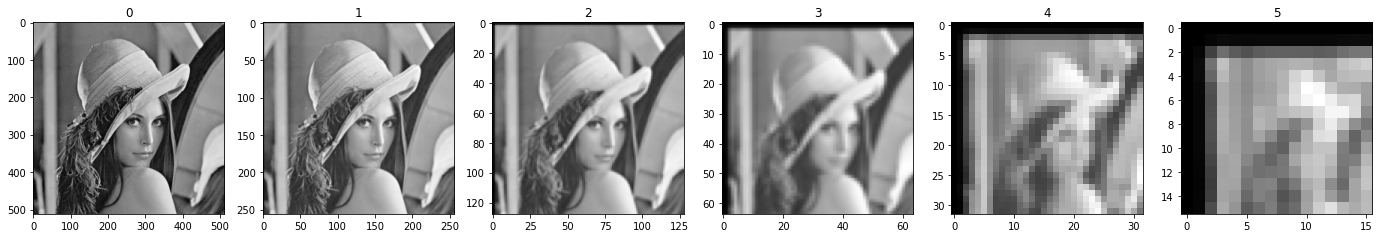

In [ ]:
#Version 2 - 2D sum

def GREDUCE(I, h):                      #I is an image
  height = len(I[0])
  width = len(I[:,0])
  biggerImage = np.zeros((height+4, width+4))
  biggerImage[2:height+2, 2:width+2] = I
  newTable = np.zeros((height//2, width//2))
  for i in range(0, height//2):
    for j in range(0, width//2):
      pixel = 0
      for m in range(-2,3):
        for n in range(-2,3):
          pixel += h[m+2][n+2] * biggerImage[2*i + m][2*j + n]
      newTable[i][j] = pixel
  return newTable


#Test
I = [Y]
for i in range(0,5): 
  I.append(GREDUCE(I[i], GKernel2D(3/8)))
im_show_all(I)

In [ ]:
#Version 3 - 2D with convolution (Best)

def GREDUCE(I, h):                                    #I is an image, h are the weights 
  height = I.shape[0]                                   #height of image
  width = I.shape[1]                                    #width of image
  if (len(I.shape) == 2):
    newTable = np.zeros((height//2, width//2), np.ubyte)               
    for i in range(height//2):                           #undersampling to decrease the size and get the next pyramid
      for j in range(width//2):
        newTable[i][j] = I[2*i][2*j]
    convTable = ndimage.convolve(newTable, h, mode='reflect')     #get the table after convolution - we can play with other mode properties
    return convTable
  else:
    newTable = np.zeros((height//2, width//2, 3), np.ubyte)
    for k in range(3):
      newTable[:,:,k] = GREDUCE(I[:,:,k], h)
    #print(newTable.shape)
    return newTable


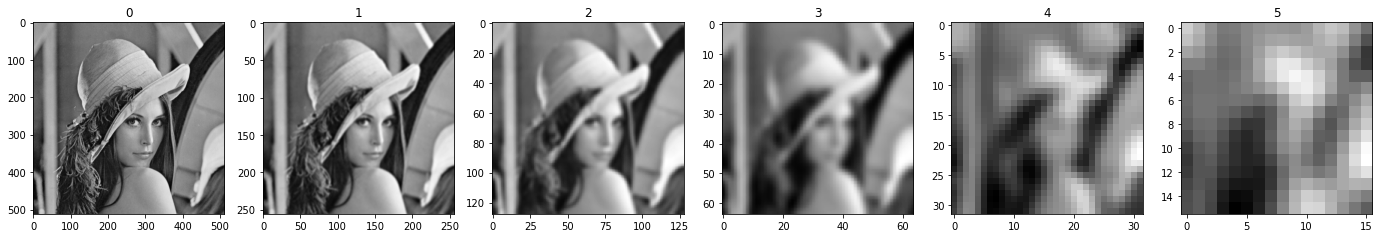

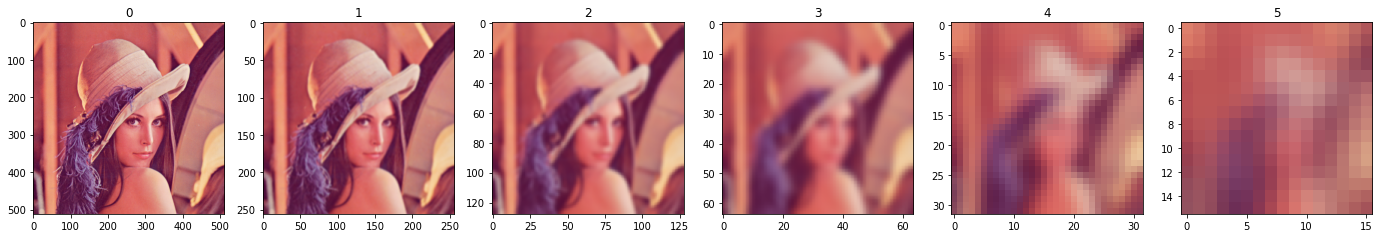

In [ ]:
#Test for gray and colored image

RGB_from_BGR = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
I_color = [RGB_from_BGR]
I_gray = [Y]              

for i in range(0,5): 
  I_gray.append(GREDUCE(I_gray[i], GKernel2D(3/8)))
  I_color.append(GREDUCE(I_color[i], GKernel2D(3/8)))
  
im_show_all(I_gray)
im_show_all(I_color)

####GPyramid

γ) Υλοποιήστε τη συνάρτηση G = GPyramid(I, a, depth) (η οποία θα καλεί τις συναρτήσεις
GKernel(a) και GREDUCE(I,h)) όπου θα δέχεται ως είσοδο μία εικόνα Ι, την παράμετρο ‘a’, το
επιθυμητό βάθος για την πυραμίδα ’depth’ και θα επιστρέφει την Gaussian pyramid και θα την
αποθηκεύει.

In [ ]:
def GPyramid(I, a, depth):                    #get starting image and return a list of it's Gaussian pyramid
    my_a = GKernel(a)
    myPyr = [I]                 
    for i in range(depth):
      myPyr.append(GREDUCE(myPyr[i], my_a)) #uint8 for sure?
    return myPyr

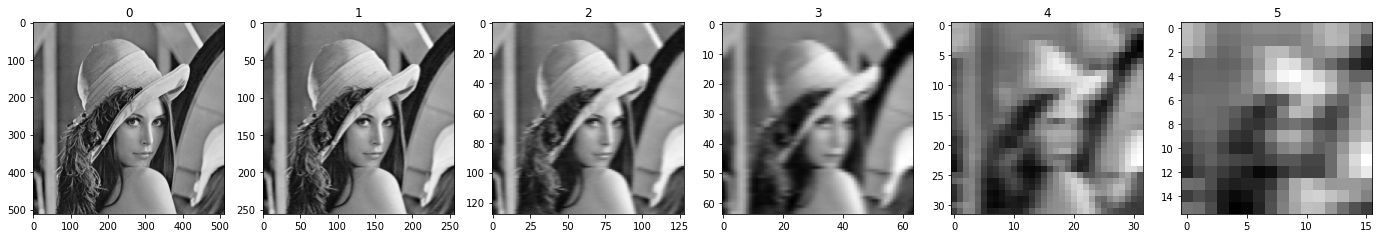

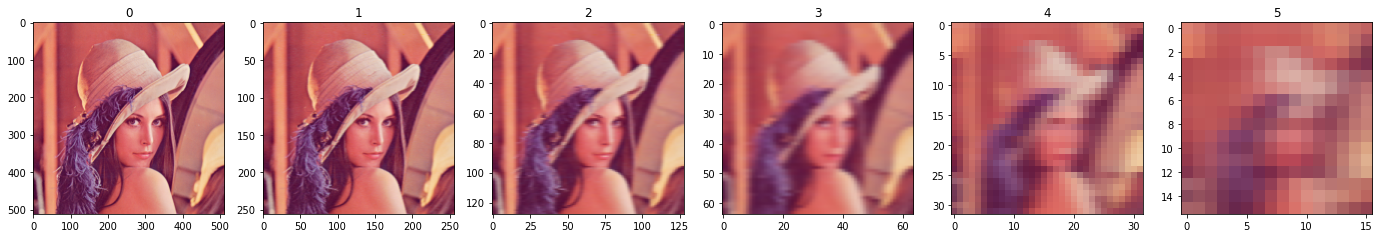

In [ ]:
#Test for gray and colored image

I_color = RGB_from_BGR
I_gray = Y

im_show_all(GPyramid(I_gray, 3/8, 5))
im_show_all(GPyramid(I_color, 3/8, 5))

####GEXPAND

δ) Υλοποιήστε τη συνάρτηση I_out = GEXPAND (I, h) την εξίσωση (2) (σελίδα άρθρου 534).

In [ ]:
def GEXPAND(I, h):                                    #I is an image, h are the weights
  height = I.shape[0]                                 #height of image
  width = I.shape[1]                                  #width of image
  if (len(I.shape) == 2):
    newTable = np.zeros((2*height, 2*width), np.ubyte)  
    newTable[::2,::2] = I 
    I_out = cv2.filter2D(newTable, -1, h)
    #convTable = ndimage.convolve(I, h, mode='reflect')  #get the table after convolution - we can play with other mode properties 
    #for i in range(0, 2*height):                        #oversampling to increase the size and get the next pyramid
      #for j in range(0, 2*width):
        #newTable[i][j] = 4 * convTable[i//2][j//2]
    #print(4 * I_out.astype(dtype=np.float64))
    return 4 * I_out.astype(dtype=np.float64)
  else:
    newTable = np.zeros((2*height, 2*width, 3), np.ubyte)
    for k in range(3):
      newTable[:,:,k] = GEXPAND(I[:,:,k], GKernel2D(3/8))
    return newTable  

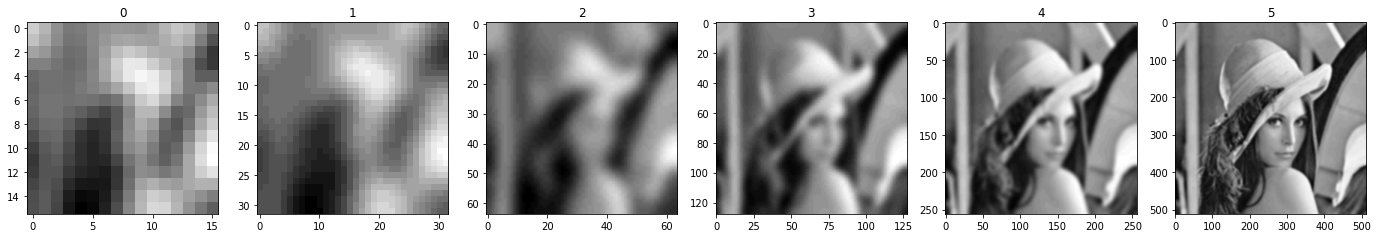

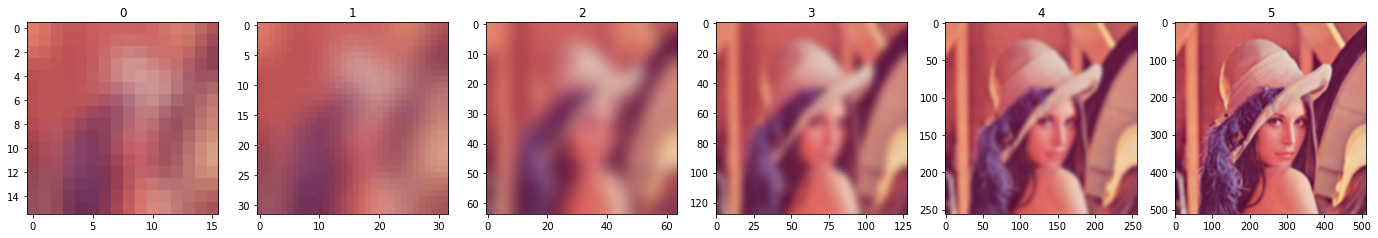

In [ ]:
#Test for gray and colored image

I_gray = [Y]
I_color = [(RGB_from_BGR)]                                           #Make the small image first
for i in range(0,5): 
  I_gray.append(GREDUCE(I_gray[i], GKernel2D(3/8)))
  I_color.append(GREDUCE(I_color[i], GKernel2D(3/8)))

I_gray_2 = [I_gray[5]]
I_color_2 = [I_color[5]]
for i in range(0,5):
  I_gray_2.append(GEXPAND(I_gray[5-i], GKernel2D(3/8)))
  I_color_2.append(GEXPAND(I_color[5-i], GKernel2D(3/8)))

im_show_all(I_gray_2)
im_show_all(I_color_2)

####LPyramid

ε) Χρησιμοποιώντας τη συνάρτηση του (γ) ερωτήματος, υλοποιήστε τη συνάρτηση L = LPyramid(I,
a, depth) όπου θα επιστρέφει την Laplacian πυραμίδα της εικόνας I

In [ ]:
def Lpyramid(I, a, depth):
  my_list = (GPyramid(I, a, depth)).copy()                     
  LPyr = []
  for i in range(depth):
    LPyr.append(my_list[i] - GEXPAND(my_list[i+1], GKernel2D(a)) - 128)
  LPyr.append(my_list[depth])
  return LPyr

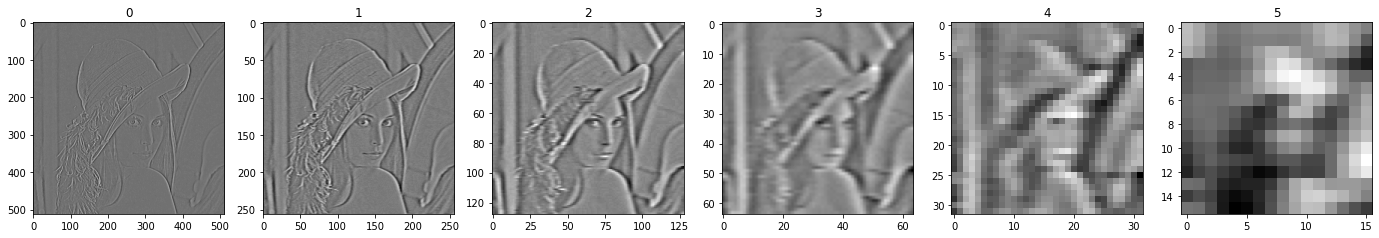

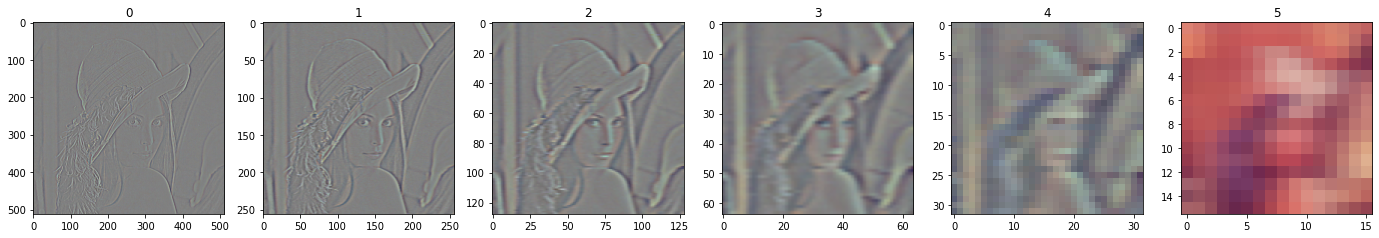

In [ ]:
#Test for gray and colored images

I_gray = Y
I_color = RGB_from_BGR

im_show_all(Lpyramid(I_gray, 3/8, 5))
#im_show_all(Lpyramid(I_gray, 0.6, 5))
im_show_all(Lpyramid(I_color, 3/8, 5))
#im_show_all(Lpyramid(I_color, 0.6, 5))

####L_Pyramid_Decode

στ) Υλοποιήστε τη συνάρτηση I_out = L_Pyramid_Decode(L,a) όπου λαμβάνει την Laplacian
πυραμίδα L και την παράμετρο 'a' που χρησιμοποιήθηκε για τη δημιουργία της και επιστρέφει την
αποκωδικοποιημένη εικόνα I_out.

In [ ]:
def L_Pyramid_Decode(L, a):                                 #L is the list of the Laplacian pyramid
  length = len(L) 
  my_list = [L[length-1]]
  for i in range(0, length-1):
    my_list.append(L[length-2-i] + GEXPAND(my_list[i], GKernel2D(a)) + 128)
  return my_list[length-1]

True
True


Text(0.5, 1.0, 'Recovered Colored Lena')

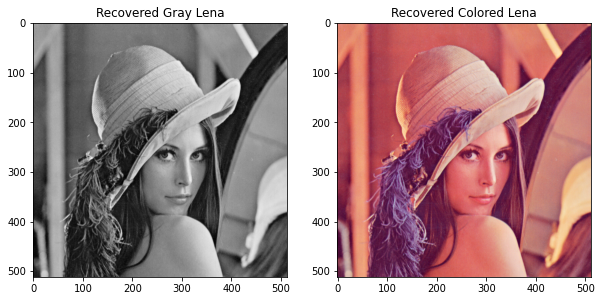

In [ ]:
#Test for gray and colored images

I_gray = Y
I_color = img_as_ubyte(RGB_from_BGR)
#print(I_color)

print((L_Pyramid_Decode(Lpyramid(I_gray, 3/8, 6), 3/8) == I_gray).all())
print((L_Pyramid_Decode(Lpyramid(I_color, 3/8, 6), 3/8).astype('uint8') == I_color).all())

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5)) # (lines, columns, inches)

ax0.imshow(L_Pyramid_Decode(Lpyramid(I_gray, 3/8, 6), 3/8), cmap='gray')
ax0.set_title('Recovered Gray Lena', fontsize=12)

ax1.imshow(L_Pyramid_Decode(Lpyramid(I_color, 3/8, 6), 3/8).astype('uint8'))
ax1.set_title('Recovered Colored Lena', fontsize=12)


####L_Quantization

ζ) Υλοποιήστε τη συνάρτηση κβαντισμού L_Quantization, σύμφωνα με την εξίσωση (5) (σελ.
άρθρου 538)


In [ ]:
def L_Quantization(L, n):                     #L is a Laplacian Pyramid, n is the size of the bins
  num_of_bins = 256 // n
  length = len(L)
  list1 = []
  for k in range(length):
    new_table = np.zeros(L[k].shape, np.ubyte)
    #L[k] = img_as_float(L[k])
    if (len(L[k].shape) == 2):
      for i in range(L[k].shape[0]):
        for j in range(L[k].shape[1]):
          new_table[i][j] = (L[k][i][j]//n) * n + n // 2
      list1.append(new_table)
    else:
      for m in range(3):
        for i in range(L[k].shape[0]):
          for j in range(L[k].shape[1]):
            new_table[i][j][m] = (L[k][i][j][m]//n) * n + n // 2
      list1.append(new_table)
  return list1

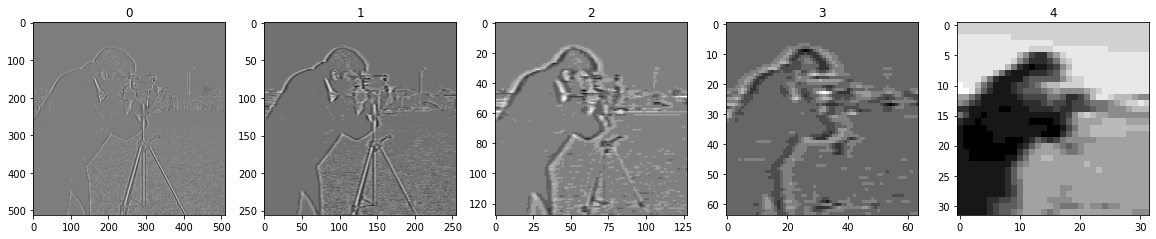

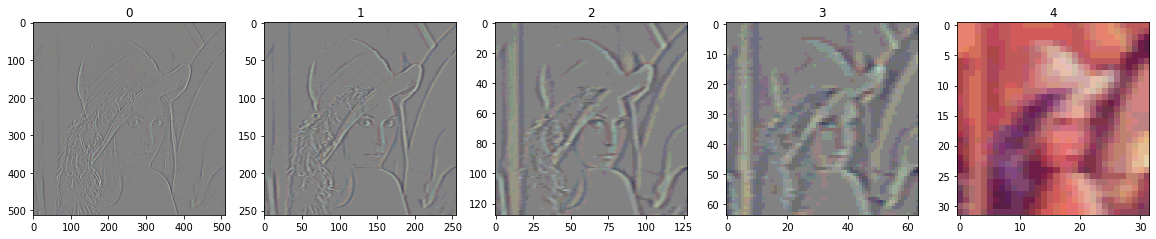

In [ ]:
image1 = data.camera()
im_show_all(L_Quantization(Lpyramid(image1, 3/8, 4), 20))

image2 = RGB_from_BGR
im_show_all(L_Quantization(Lpyramid(image2, 3/8, 4), 20))
#a = L_Pyramid_Decode(L_Quantization(Lpyramid(Y, 3/8, 6), 32), 3/8)
#im_show_all(a)


###Β. Δοκιμές αλγορίθμου

####Ερώτημα α

Ελέγξτε τις υλοποιήσεις των συναρτήσεών σας L_Pyramid και L_Pyramid_Decode
χρησιμοποιώντας τις εικόνες Lena και camera. Πρέπει να λειτουργούν και για έγχρωμες και για
grayscale εικόνες.


Text(0.5, 1.0, 'RGB Lena')

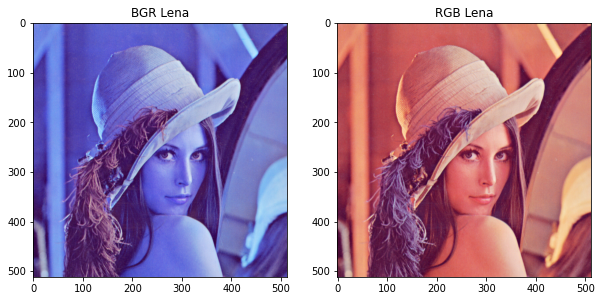

In [ ]:
#Convert BGR_Lena to RGB_Lena
Lena_BGR = BGR
Lena_RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10)) 

ax0.imshow(Lena_BGR)
ax0.set_title('BGR Lena', fontsize=12)

ax1.imshow(Lena_RGB)
ax1.set_title('RGB Lena', fontsize=12)

Decoding is fine: True
Decoding is fine: True


Text(0.5, 1.0, 'Recovered Lena')

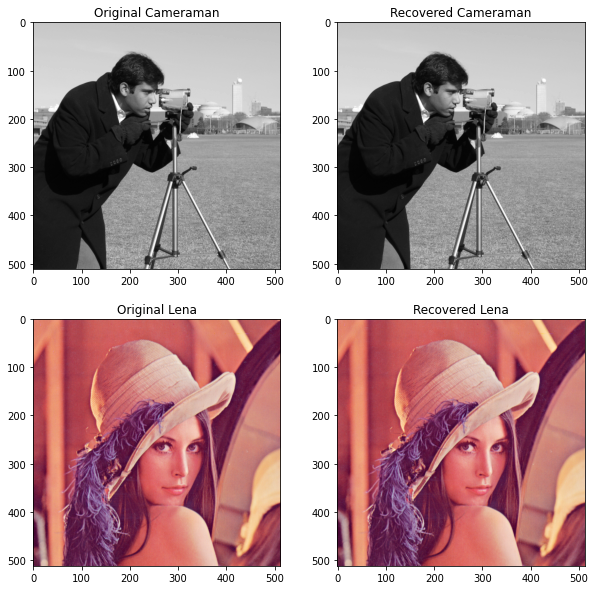

In [ ]:
#Check if it works for gray images

image1 = data.camera()                            #load images                            
Lena_RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)

L1 = Lpyramid(image1, 3/8, 6)                      #get L-pyramids
L2 = Lpyramid(Lena_RGB, 3/8, 6)    

decoded_L1 = L_Pyramid_Decode(L1, 3/8)             #Decode L-pyramids
decoded_L2 = L_Pyramid_Decode(L2, 3/8)


#Check if the recovered images are exactly the same as the original
print("Decoding is fine:", (decoded_L1 == image1).all())
print("Decoding is fine:", (decoded_L2 == Lena_RGB).all())


#Plot the images
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 10)) 

ax0.imshow(image1, cmap='gray')
ax0.set_title('Original Cameraman', fontsize=12)

ax1.imshow(decoded_L1, cmap='gray')
ax1.set_title('Recovered Cameraman', fontsize=12)

ax2.imshow(Lena_RGB)
ax2.set_title('Original Lena', fontsize=12)

ax3.imshow(decoded_L2)#.astype('uint8')
ax3.set_title('Recovered Lena', fontsize=12)


####Ερώτημα β

Εμφανίστε την αρχική και την αποκωδικοποιημένη εικόνα, χρησιμοποιώντας διαφορετικά ‘a’ με τιμές να κυμαίνονται στο διάστημα [0.2,..,0.7].


* Με τη χρήση της έγχρωμης εικόνας Lena:

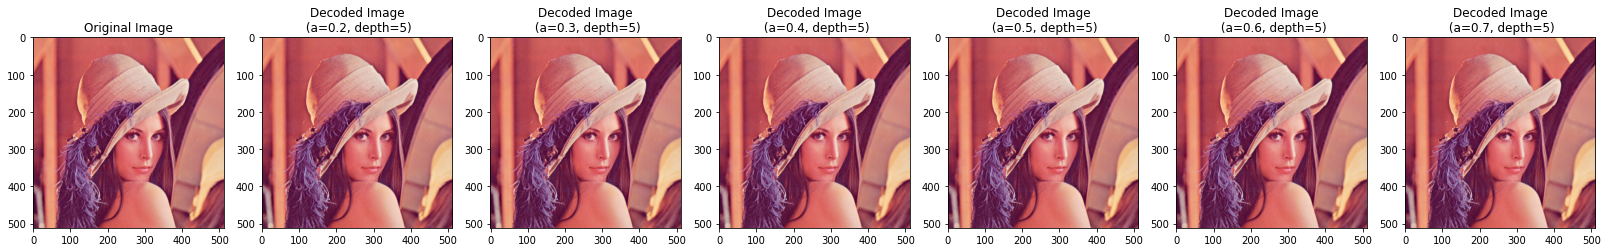

In [ ]:
Lena_RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
decoded = [Lena_RGB]
titles = ['Original Image']
a = np.linspace(0.2,0.7,6)
depth = 5

for i in a:
  decoded.append(L_Pyramid_Decode(Lpyramid(Lena_RGB, i, depth), i))
  titles.append('Decoded Image\n (a='+str(i)+', depth='+str(depth)+')')

im_show_all(decoded, 4, titles)

* Με τη χρήση της grayscale εικόνας Cameraman:

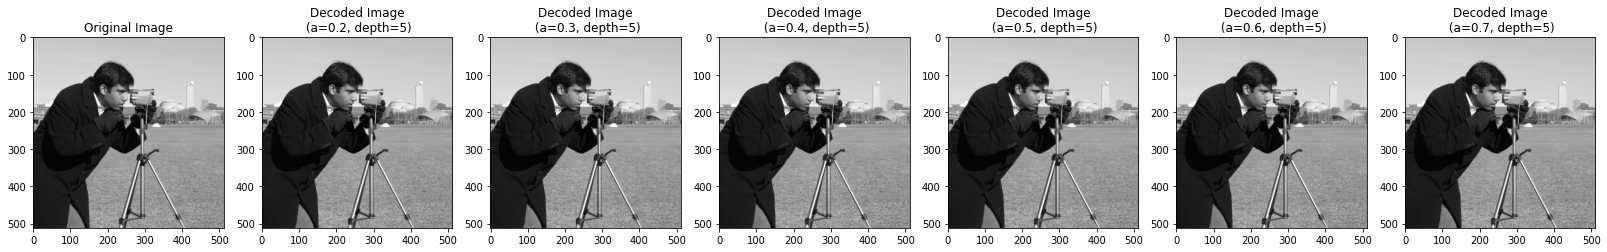

In [ ]:
image1 = data.camera()
decoded = [image1]
titles = ['Original Image']
a = np.linspace(0.2,0.7,6)
depth = 5

for i in a:
  decoded.append(L_Pyramid_Decode(Lpyramid(image1, i, depth), i))
  titles.append('Decoded Image\n (a='+str(i)+', depth='+str(depth)+')')

im_show_all(decoded, 4, titles)

**Παρατηρήσεις:**<br>
Μπορούμε να διακρίνουμε πως ανεξαρτήτως της τιμής a της πυραμίδας που επιλέγουμε, οι αποκωδικοποιημένες εικόνες είναι ίδιες με την αρχική τόσο στη grayscale όσο και στην έγχρωμη εικόνα.

####Ερώτημα γ

Εμφανίστε την αρχική και την αποκωδικοποιημένη εικόνας, χρησιμοποιώντας διαφορετικά
‘depth’ με τιμές να κυμαίνονται στο διάστημα [2,..,7].


* Με τη χρήση της έγχρωμης εικόνας Lena:

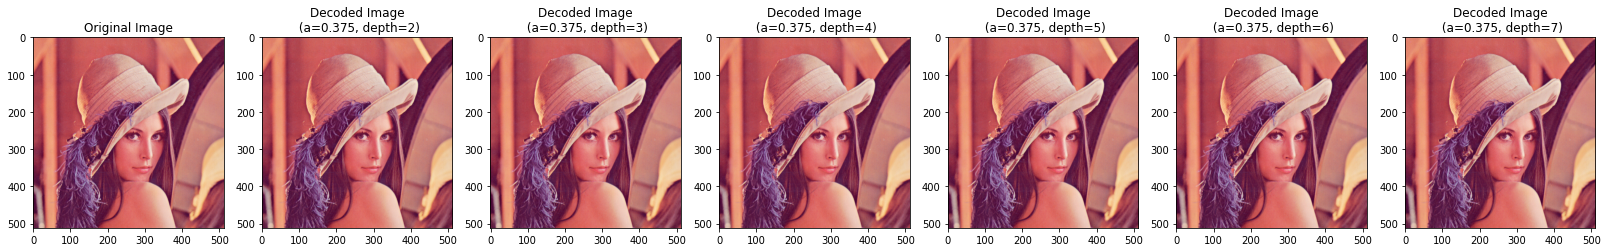

In [ ]:
Lena_RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
decoded = [Lena_RGB]
titles = ['Original Image']
a = 3/8
depth = np.arange(2, 8, 1)

for i in depth:
  decoded.append(L_Pyramid_Decode(Lpyramid(Lena_RGB, a, i), a))
  titles.append('Decoded Image\n (a='+str(a)+', depth='+str(i)+')')

im_show_all(decoded, 4, titles)

* Με τη χρήση της grayscale εικόνας Cameraman:

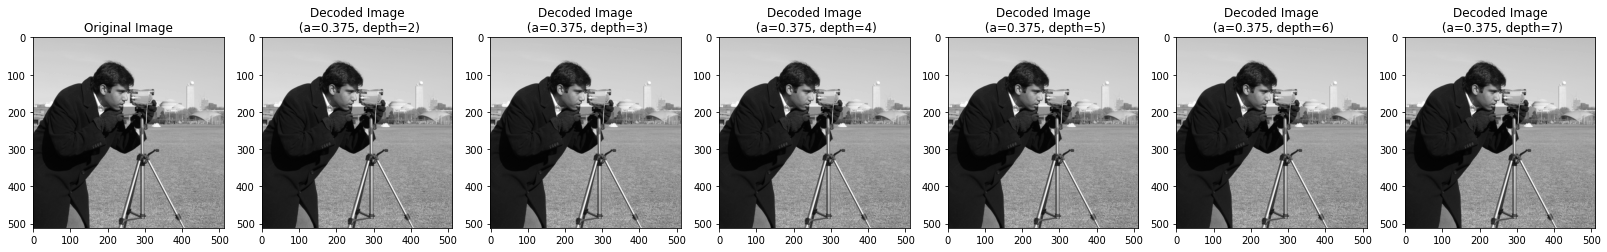

In [ ]:
image1 = data.camera()
decoded = [image1]
titles = ['Original Image']
a = 3/8
depth = np.arange(2, 8, 1)

for i in depth:
  decoded.append(L_Pyramid_Decode(Lpyramid(image1, a, i), a))
  titles.append('Decoded Image\n (a='+str(a)+', depth='+str(i)+')')

im_show_all(decoded, 4, titles)

**Παρατηρήσεις:**<br>
Μπορούμε να διακρίνουμε πως ανεξαρτήτως του βάθους της πυραμίδας που επιλέγουμε, οι αποκωδικοποιημένες εικόνες είναι ίδιες με την αρχική τόσο στη grayscale όσο και στην έγχρωμη εικόνα.

####Ερώτημα δ

Υπολογίστε την εντροπία και παρουσιάστε τα αντίστοιχα διαγράμματα για τα διαφορετικά ‘a’, και
‘depth’ , για κάθε εικόνα και σχολιάστε επαρκώς.


In [ ]:
def entropy_of_Pyr(I, a, depth):
  final_entropy = 0
  #height = I.shape[0]
  #width = I.shape[1]
  #num_of_pixels = height * width
  if (len(I.shape) == 2):                           #grayscale image
    L = Lpyramid(I, a, depth)
    sum_list = np.zeros([256, 1], np.float64)
    for i in range(depth+1):
      L[i] = np.around(L[i]).astype(np.uint8) 
      hist = cv2.calcHist([L[i]], [0], None, [256], [0, 256])
      sum_list += hist
  else:
    for k in range(3):      
      final_entropy += entropy_of_Pyr(I[:,:,k], a, depth)
    return (final_entropy / 3)                       #mean value of rgb channels 
    #for k in range(256):
      #prob = (sum_list[k] / num_of_pixels)
      #if (prob != 0):
        #final_entropy += prob * np.log2(prob)
  return entropy(sum_list)[0]  #-final_entropy[0]

In [ ]:
a = 0.6
depth = 5

entropy_of_Pyr(Lena_RGB, a, depth)

3.231616990312194

In [ ]:
def entropy_of_im(I, a, depth):
  must_1 = 0
  sum_of_hist = np.zeros([256, 1], np.float64)
  if (len(I.shape) == 2):                     #grayscale image
    I = np.around(I).astype(np.uint8) 
    hist = cv2.calcHist([I], [0], None, [256], [0, 256])
    #plt.plot(hist, color='black')
    sum_of_hist += hist
  else:
    colors_table = ['red', 'green', 'blue']
    for k in range(3):
      I = np.around(I).astype(np.uint8)
      hist = cv2.calcHist([I], [k], None, [256], [0, 256])
      #plt.plot(hist, color=colors_table[k])
      sum_of_hist += hist
  return entropy(sum_of_hist)[0]

In [ ]:
a = 0.5
depth = 7

entropy_of_im(Lena_RGB, a, depth)

5.372125612734907

* Με τη χρήση της grayscale εικόνας Cameraman:

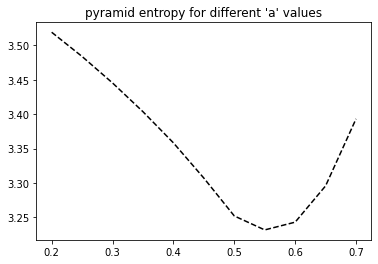

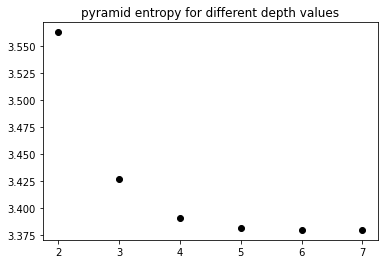

In [ ]:
# grayscale image
x_a = np.arange(0.2, 0.75, 0.05)
y_a = [entropy_of_Pyr(data.camera(), i, 5) for i in x_a]
plt.plot(x_a, y_a, "--b", color="black")
plt.title("pyramid entropy for different 'a' values")
plt.show()

x_d = np.arange(2,8)
y_d = [entropy_of_Pyr(data.camera(), 0.375, i) for i in range(2,8)]
plt.plot(x_d, y_d, "ob", color="black")
plt.title("pyramid entropy for different depth values")
plt.show()

* Με τη χρήση της έγχρωμης εικόνας Lena:



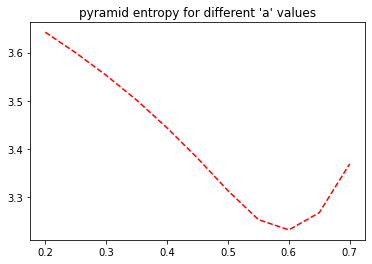

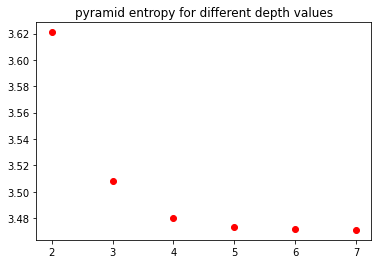

In [ ]:
# colored image
x_a = np.arange(0.2, 0.75, 0.05)
y_a = [entropy_of_Pyr(Lena_RGB, i, 5) for i in x_a]
plt.plot(x_a, y_a, "--b", color="red")
plt.title("pyramid entropy for different 'a' values")
plt.show()

x_d = np.arange(2,8)
y_d = [entropy_of_Pyr(Lena_RGB, 0.375, i) for i in range(2,8)]
plt.plot(x_d, y_d, "ob", color="red")
plt.title("pyramid entropy for different depth values")
plt.show()

**Παρατηρήσεις:**

1.  Παρατηρούμε τόσο για της έγχρωμες όσο και για τις ασπρόμαυρες εικόνες, πως η εντροπία των πυραμίδων ελαχιστοποιείται για 'a' στο διάστημα (0.55,0.60), δηλαδή κοντά στο 0.6. Πιο συγκεκριμένα η έγχρωμη εικόνα έχει ολικό ελάχιστο στο 0.6 ενώ η ασπρόμαυρη στο 0.55. Το αποτέλεσμα αυτό ήταν αναμενόμενο, καθώς στο paper των Burt και Adelson αναφέρεται πως η βέλτιστη τιμή του 'a' για την ελαχιστοποίηση της εντροπίας στην εικόνα της lena είναι η τιμή 0.6 ("We found that the greatest reduction was obtained for a = 0.6 in our examples"). 

2. Από τα διαγράμματα εντροπίας-βάθους είναι αντιληπτό πως η εντροπία μειώνεται με την αύξηση του βάθους μιας πυραμίδας, δηλαδή η εντροπία είναι αντιστρόφως ανάλογη με το συνολικό αριθμό των επιπέδων της. Το συμπέρασμα αυτό προκύπτει και από το άρθρο των Burt και Adelson, αφού αν έχουμε περισσότερα επίπεδα πυραμίδας θα έχουμε περισσότερες εικόνες με "συγκεντρωμένο" ιστόγραμμα και λιγότερες με "απλωμένο" ιστόγραμμα.



####Ερώτημα ε

Εντοπίστε το βέλτιστο ‘a’, χρησιμοποιώντας την εντροπία και τη διακύμανση των τιμών των
εικονοστοιχείων σε κάθε επίπεδο της πυραμίδας Laplacian, για κάθε εικόνα.


* Με τη χρήση της grayscale εικόνας Cameraman:

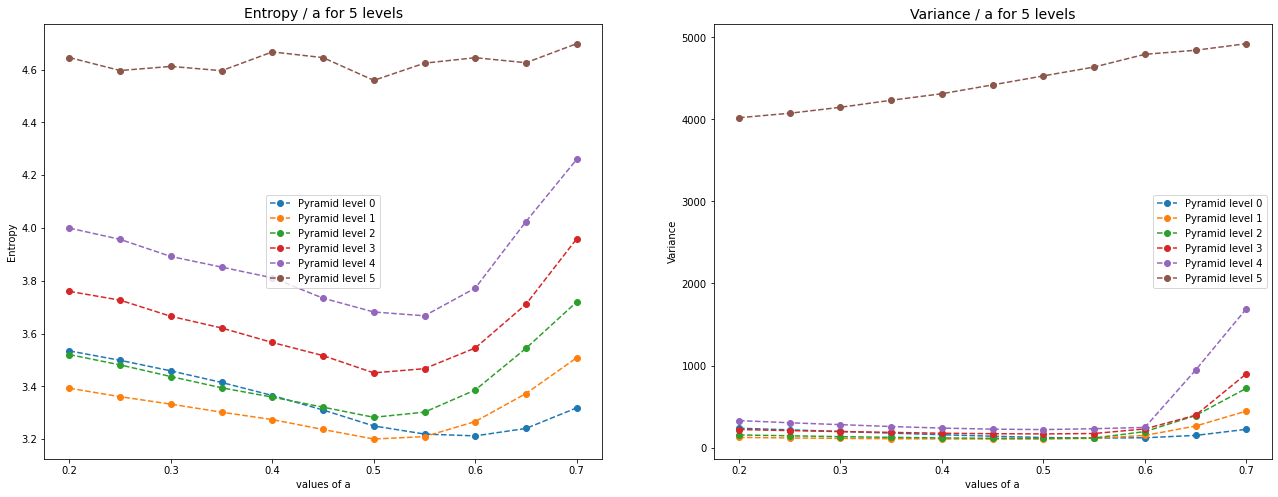

In [ ]:
# grayscale image
leg = ["Pyramid level %d" %d for d in range(0, depth+1)]
depth = 5
x_a = np.arange(0.2, 0.75, 0.05)
L = [Lpyramid(data.camera(), k, depth) for k in x_a]
y_a = np.zeros([x_a.shape[0],depth+1], np.float64)
z_a = np.zeros([x_a.shape[0],depth+1], np.float64)
for i in range(x_a.shape[0]):
  for j in range(depth+1):
    y_a[i][j] = entropy_of_im(L[i][j], x_a[i], depth)
    z_a[i][j] = np.var(L[i][j])
#print(y_a)
#print(z_a)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(22, 8))

ax0.plot(x_a, y_a, "--o")
ax0.legend(leg)
ax0.set_title('Entropy / a for 5 levels', fontsize=14)
ax0.set_ylabel('Entropy', fontsize=10)
ax0.set_xlabel('values of a', fontsize=10)

ax1.plot(x_a, z_a, "--o")
ax1.legend(leg)
ax1.set_title('Variance / a for 5 levels', fontsize=14)
ax1.set_ylabel('Variance', fontsize=10)
ax1.set_xlabel('values of a', fontsize=10)

plt.show()

**Παρατηρήσεις:**<br>

1. Στο αριστερό διάγραμμα (εντροπία-a) το κάθε χρώμα αντιστοιχεί σε ένα επίπεδο πυραμίδας, συνεπώς μπορούμε να διακρίνουμε για κάθε επίπεδο την εντροπία σε συνάρτηση με το 'a'. Πιο συγκεκριμένα, για το επίπεδο 5 (μωβ χρώμα) της πυραμίδας (δηλαδή για την κορυφή της πυραμίδας) παρατηρούμε ότι η εντροπία ελαχιστοποιείται για a=0.55. Ομοίως μπορούμε να βγάλουμε συμπεράσματα για τα υπόλοιπα επίπεδα της πυραμίδας: 

  *   Επίπεδο 0: ελάχιστη εντροπία για a=0.6
  *   Επίπεδο 1: ελάχιστη εντροπία για a=0.5
  *   Επίπεδο 2: ελάχιστη εντροπία για a=0.5
  *   Επίπεδο 3: ελάχιστη εντροπία για a=0.5
  *   Επίπεδο 4: ελάχιστη εντροπία για a=0.55
  *   Επίπεδο 5: ελάχιστη εντροπία για a=0.5

2. Στο δεξί διάγραμμα (διασπορά-a) και πάλι το κάθε χρώμα αντιστοιχεί σε ένα επίπεδο πυραμίδας, οπότε μπορούμε να διακρίνουμε για κάθε επίπεδο τη διασπορά σε συνάρτηση με το 'a'. Για παράδειγμα, για βάθος 5 βλέπουμε ότι η διασπορά ελαχιστοποιείται για a=0.5. Ομοίως βρίσκουμε τις ελάχιστες διασπορές και για τα άλλα επίπεδα:

  *   Επίπεδο 0: ελάχιστη διασπορά για a=0.55
  *   Επίπεδο 1: ελάχιστη διασπορά για a=0.5
  *   Επίπεδο 2: ελάχιστη διασπορά για a=0.5
  *   Επίπεδο 3: ελάχιστη διασπορά για a=0.5
  *   Επίπεδο 4: ελάχιστη διασπορά για a=0.5
  *   Επίπεδο 5: ελάχιστη διασπορά για a=0.2



* Με τη χρήση της έγχρωμης εικόνας Lena:


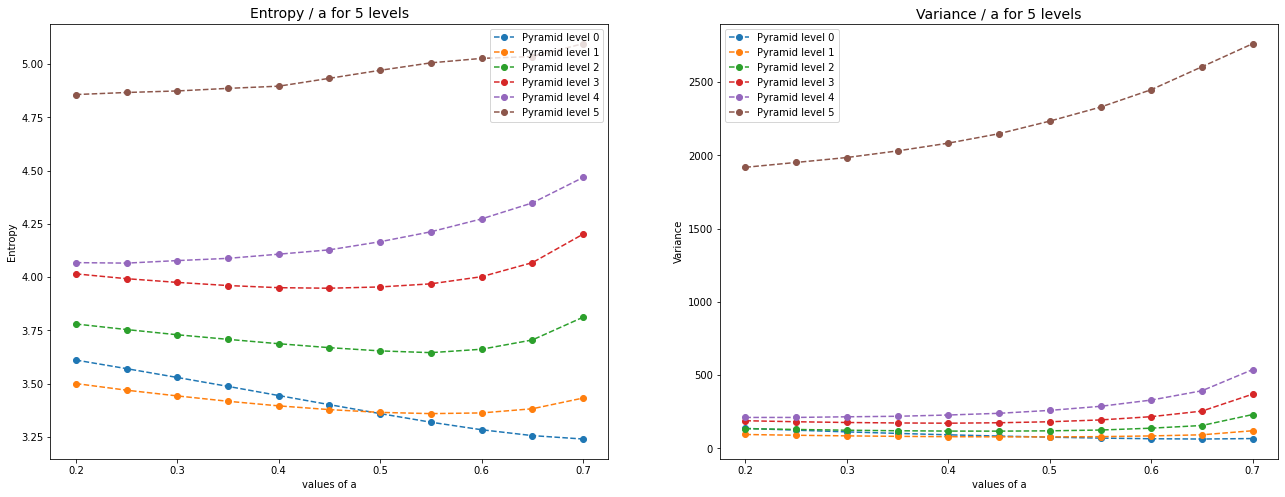

In [ ]:
#colored image
Lena_RGB = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)

leg = ["Pyramid level %d" %d for d in range(0, depth+1)]
depth = 5
x_a = np.arange(0.2, 0.75, 0.05)
L = [Lpyramid(Lena_RGB, k, depth) for k in x_a]
y_a = np.zeros([x_a.shape[0],depth+1], np.float64)
z_a = np.zeros([x_a.shape[0],depth+1], np.float64)
for i in range(x_a.shape[0]):
  for j in range(depth+1):
    y_a[i][j] = entropy_of_im(L[i][j], x_a[i], depth)
    z_a[i][j] = np.var(L[i][j])
    #print(min(y_a[i][:]))
#print(y_a)
#print(z_a)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(22, 8))

ax0.plot(x_a, y_a, "--o")
ax0.legend(leg)
ax0.set_title('Entropy / a for 5 levels', fontsize=14)
ax0.set_ylabel('Entropy', fontsize=10)
ax0.set_xlabel('values of a', fontsize=10)

ax1.plot(x_a, z_a, "--o")
ax1.legend(leg)
ax1.set_title('Variance / a for 5 levels', fontsize=14)
ax1.set_ylabel('Variance', fontsize=10)
ax1.set_xlabel('values of a', fontsize=10)

plt.show()

**Παρατηρήσεις:**<br>

1. Στο αριστερό διάγραμμα (εντροπία-a) το κάθε χρώμα αντιστοιχεί σε ένα επίπεδο πυραμίδας, συνεπώς μπορούμε να διακρίνουμε για κάθε επίπεδο την εντροπία σε συνάρτηση με το 'a'. Πιο συγκεκριμένα, για το επίπεδο 5 (μωβ χρώμα) της πυραμίδας (δηλαδή για την κορυφή της πυραμίδας) παρατηρούμε ότι η εντροπία ελαχιστοποιείται για a=0.55. Ομοίως μπορούμε να βγάλουμε συμπεράσματα για τα υπόλοιπα επίπεδα της πυραμίδας: 

  *   Επίπεδο 0: ελάχιστη εντροπία για a=0.7
  *   Επίπεδο 1: ελάχιστη εντροπία για a=0.55
  *   Επίπεδο 2: ελάχιστη εντροπία για a=0.55
  *   Επίπεδο 3: ελάχιστη εντροπία για a=0.45
  *   Επίπεδο 4: ελάχιστη εντροπία για a=0.25
  *   Επίπεδο 5: ελάχιστη εντροπία για a=0.2


2. Στο δεξί διάγραμμα (διασπορά-a) και πάλι το κάθε χρώμα αντιστοιχεί σε ένα επίπεδο πυραμίδας, οπότε μπορούμε να διακρίνουμε για κάθε επίπεδο τη διασπορά σε συνάρτηση με το 'a'. Για παράδειγμα, για βάθος 5 βλέπουμε ότι η διασπορά ελαχιστοποιείται για a=0.5. Ομοίως βρίσκουμε τις ελάχιστες διασπορές και για τα άλλα επίπεδα:

  *   Επίπεδο 0: ελάχιστη διασπορά για a=0.65
  *   Επίπεδο 1: ελάχιστη διασπορά για a=0.45
  *   Επίπεδο 2: ελάχιστη διασπορά για a=0.45
  *   Επίπεδο 3: ελάχιστη διασπορά για a=0.4
  *   Επίπεδο 4: ελάχιστη διασπορά για a=0.2
  *   Επίπεδο 5: ελάχιστη διασπορά για a=0.2


Υπολογίζουμε το βέλτιστο α για την πυραμίδα του cameraman και της lena (εδώ λαμβάνεται υπόψη μόνο η εντροπία):

In [ ]:
#Για τον cameraman
depth = 5
x_a = np.arange(0.2, 0.75, 0.05)
y = np.zeros([x_a.shape[0]], np.float64)
for i in range(x_a.shape[0]):
  y[i] = entropy_of_Pyr(data.camera(), x_a[i], depth)
print("Best a for cameraman is:", 0.2 + 0.05*np.where(y == y.min())[0][0])

In [ ]:
#Για τη Lena
depth = 5
x_a = np.arange(0.2, 0.75, 0.05)
y = np.zeros([x_a.shape[0]], np.float64)
for i in range(x_a.shape[0]):
  y[i] = entropy_of_Pyr(Lena_RGB, x_a[i], depth)
print("Best a for Lena is:", 0.2 + 0.05*np.where(y == y.min())[0][0])

####Ερώτημα στ

 Για το βέλτιστο ‘a’ που υπολογίσατε στο προηγούμενο ερώτημα, κβαντίστε τις εικόνες Lena και
camera χρησιμοποιώντας διαφορετικά bin size (πραγματοποιήστε 3 διαφορετικά πειράματα για
κάθε εικόνα).


Χρησιμοποιούμε τα βέλτιστα a από το προηγούμενο ερώτημα και επίσης θεωρούμε βάθος ίσο με 5.

In [ ]:
binsize = [5, 20, 50]
a1 = 0.55

for i in range(len(binsize)):
  im_show_all(L_Quantization(Lpyramid(data.camera(), a1, 5), binsize[i]))
for i in range(len(binsize)):
  im_show_all(L_Pyramid_Decode(L_Quantization(Lpyramid(data.camera(), a1, depth), binsize[i]), a1))

In [ ]:
binsize = [5, 20, 50]
a2 = 0.6

for i in range(len(binsize)):
  im_show_all(L_Quantization(Lpyramid(Lena_RGB, a2, 5), binsize[i]))
for i in range(len(binsize)):
  im_show_all(L_Pyramid_Decode(L_Quantization(Lpyramid(Lena_RGB, a2, depth), binsize[i]), a2))


Η πρώτη σειρά κάθε εικόνας είναι για bin_size=5, η δεύτερη για bin_size=20 και η τρίτη για bin_size=50. Επιπλέον, παίρνουμε διαδοχικά τις τρεις ανακτημένες εικόνες για τα αντίσοτοιχα bin_sizes. Παρατηρούμε πως η ποιότητα του κάθε επιπέδου της πυραμίδας αλλοιώνεται όσο μεγαλύτερο είναι το bin_size τόσο στην ασπρόμαυρη όσο και στην έγχρωμη εικόνα. Αυτό έχει ως αποτέλεσμα η ανακτημένη εικόνα να είναι περισσότερο αλλοιωμένη με την αύκηση του αριθμού των bins.